In [4]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from time import time

In [12]:
df = pd.read_csv("average_data.csv")
df = df.drop(df.columns[[0]], axis=1)

In [16]:
df = df.astype({"attacked": int})

In [17]:
df.dtypes

time          float64
utm_x         float64
utm_y         float64
x             float64
y             float64
z             float64
ve            float64
vn            float64
vu            float64
pitch         float64
roll          float64
yaw           float64
qbn_0         float64
qbn_1         float64
qbn_2         float64
qbn_3         float64
init_align    float64
x_sd          float64
y_sd          float64
z_sd          float64
vx_sd         float64
vy_sd         float64
vz_sd         float64
pitch_sd      float64
roll_sd       float64
yaw_sd        float64
state         float64
attacked        int64
dtype: object

In [42]:
average_data = df.drop('attacked', axis=1)

df_scaled = StandardScaler().fit_transform(average_data)
scaled_df = pd.DataFrame(df_scaled, columns=average_data.columns)

In [16]:
pca = PCA(n_components=.95).fit(scaled_df)
transformed_df = pca.transform(scaled_df)

print('Original dimensions: ', scaled_df.shape)
print('PCA dimensions: ', transformed_df.shape)

Original dimensions:  (1567, 27)
PCA dimensions:  (1567, 8)


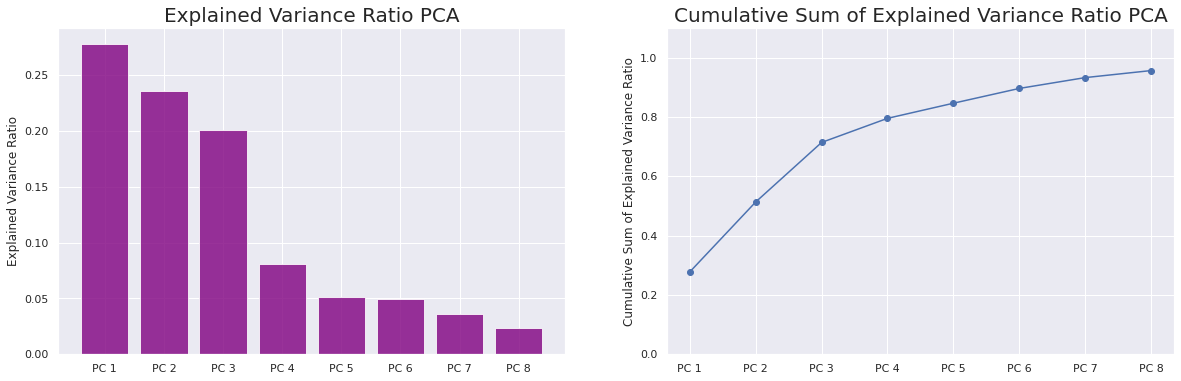

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(20,6))
ax1, ax2 = ax.ravel()

ratio = pca.explained_variance_ratio_
ax1.bar(range(len(ratio)), ratio, color='purple', alpha=0.8)
ax1.set_title('Explained Variance Ratio PCA', fontsize=20)
ax1.set_xticks(range(len(ratio)))
ax1.set_xticklabels(['PC {}'.format(i+1) for i in range(len(ratio))])
ax1.set_ylabel('Explained Variance Ratio')

# ratio[0]=0
ratio = pca.explained_variance_ratio_
ax2.plot(np.cumsum(ratio), 'o-')

ax2.set_title('Cumulative Sum of Explained Variance Ratio PCA', fontsize=20)

ax2.set_ylim(0,1.1)
ax2.set_xticks(range(len(ratio)))
ax2.set_xticklabels(['PC {}'.format(i+1) for i in range(len(ratio))])
ax2.set_ylabel('Cumulative Sum of Explained Variance Ratio');

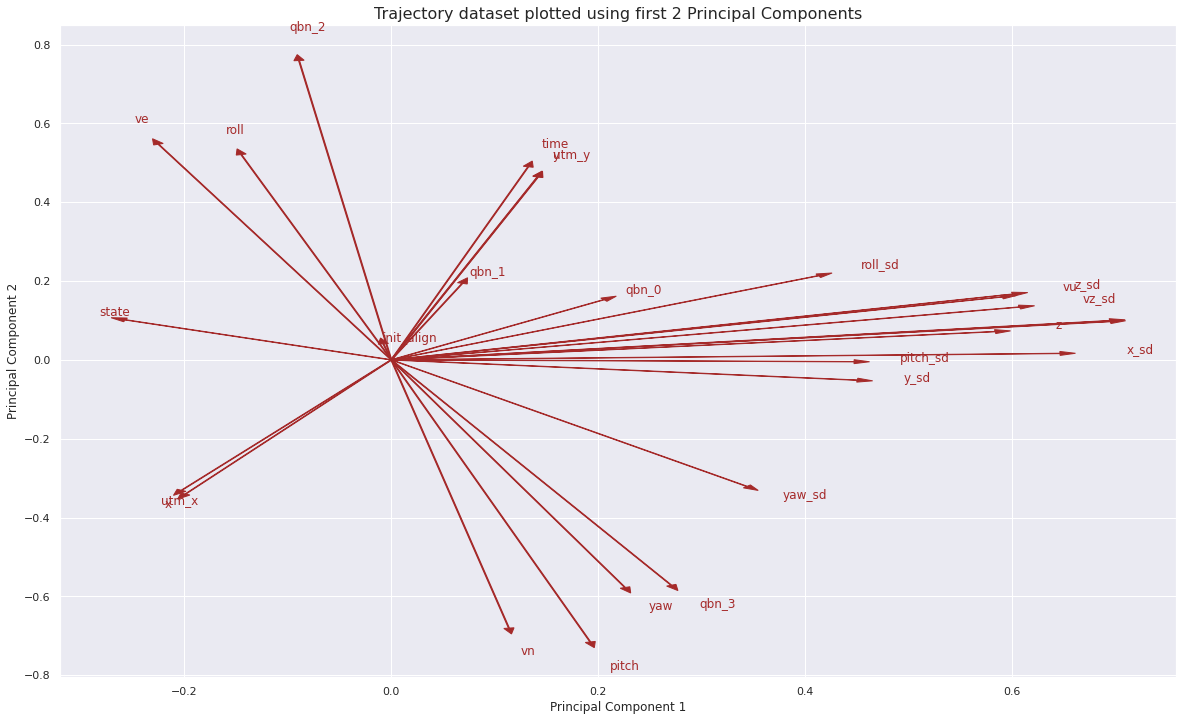

In [40]:
# to plot vectors from the center
vecs = pca.components_[0:8].T *2

fig, ax = plt.subplots(figsize=(20,12))
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('Trajectory dataset plotted using first 2 Principal Components', fontsize=16)

# plotting arrowheads of the original axes projected on the 2D PCA space
for i, vec in enumerate(vecs):
    ax.arrow(0,0,vec[0],vec[1], color='brown', head_width=0.01)
    s = 1.1
    ax.annotate(scaled_df.columns[i], (s*vec[0], s*vec[1]), color='brown')

In [44]:
df_attacked = df[df['attacked'] == 1]
df_groundtruth = df[df['attacked'] == 0]

df_attacked = df_attacked.sample(n=100)
#df.sample(n=3)

In [45]:
df_attacked

,time,utm_x,utm_y,x,y,z,ve,vn,vu,pitch,...,y_sd,z_sd,vx_sd,vy_sd,vz_sd,pitch_sd,roll_sd,yaw_sd,state,attacked
1123,1.523505e+09,351285.753786,4.023501e+06,2.222551,0.634342,52.272621,-0.008614,0.251566,-0.040105,-0.022662,...,0.000543,0.000440,0.000606,0.000372,0.000049,0.005972,0.006245,0.002393,3.000000,1
416,1.524211e+09,317011.893500,4.155991e+06,2.215329,0.655070,20.955010,0.797715,0.309270,0.002128,-0.015714,...,0.003971,0.013469,0.000293,0.000534,0.000083,0.003723,0.003572,0.006340,2.838256,1
1027,1.523505e+09,351287.195833,4.023501e+06,2.222551,0.634342,52.319227,-0.007611,0.283523,-0.033792,-0.022676,...,0.000561,0.000386,0.000374,0.000392,0.000053,0.007606,0.007502,0.002560,2.990375,1
796,1.523504e+09,351528.934647,4.022913e+06,2.222600,0.634250,52.717078,-0.088714,0.491938,-0.041562,-0.020984,...,0.013425,0.001041,0.000822,0.001247,0.000060,0.004969,0.004403,0.004751,2.778365,1
1483,1.544681e+09,316682.208449,4.155691e+06,2.215265,0.655022,17.372681,-7.002804,3.369332,-0.032462,-0.016008,...,0.003011,0.009877,0.000660,0.000563,0.000092,0.005544,0.004961,0.006535,2.856952,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1.544679e+09,325868.110963,4.155681e+06,2.217078,0.655051,41.786125,-5.947057,-1.318964,0.769402,-0.027243,...,0.071053,0.050365,0.001725,0.003106,0.000290,0.005791,0.005401,0.003671,2.682881,1
232,1.523501e+09,351271.218563,4.026502e+06,2.222538,0.634814,60.079968,1.035070,4.626568,0.026351,-0.011752,...,0.000304,0.013414,0.000367,0.000259,0.000070,0.003832,0.003846,0.005414,2.878346,1
489,1.544579e+09,336756.361408,4.077204e+06,2.219527,0.642746,16.474386,8.285397,23.041917,-0.056682,-0.017190,...,0.000495,0.015683,0.000680,0.000306,0.000195,0.005562,0.006562,0.002318,3.000000,1
1185,1.544679e+09,325867.287526,4.155665e+06,2.217078,0.655049,16.012795,-5.939319,-1.724410,-0.116547,-0.020414,...,0.007895,0.003854,0.001102,0.000969,0.000093,0.004910,0.005140,0.003634,2.879901,1


In [46]:
concatenated_df = pd.concat([df_attacked, df_groundtruth], ignore_index=True)

In [47]:
concatenated_df

,time,utm_x,utm_y,x,y,z,ve,vn,vu,pitch,...,y_sd,z_sd,vx_sd,vy_sd,vz_sd,pitch_sd,roll_sd,yaw_sd,state,attacked
0,1.523505e+09,351285.753786,4.023501e+06,2.222551,0.634342,52.272621,-0.008614,0.251566,-0.040105,-0.022662,...,0.000543,0.000440,0.000606,0.000372,0.000049,0.005972,0.006245,0.002393,3.000000,1
1,1.524211e+09,317011.893500,4.155991e+06,2.215329,0.655070,20.955010,0.797715,0.309270,0.002128,-0.015714,...,0.003971,0.013469,0.000293,0.000534,0.000083,0.003723,0.003572,0.006340,2.838256,1
2,1.523505e+09,351287.195833,4.023501e+06,2.222551,0.634342,52.319227,-0.007611,0.283523,-0.033792,-0.022676,...,0.000561,0.000386,0.000374,0.000392,0.000053,0.007606,0.007502,0.002560,2.990375,1
3,1.523504e+09,351528.934647,4.022913e+06,2.222600,0.634250,52.717078,-0.088714,0.491938,-0.041562,-0.020984,...,0.013425,0.001041,0.000822,0.001247,0.000060,0.004969,0.004403,0.004751,2.778365,1
4,1.544681e+09,316682.208449,4.155691e+06,2.215265,0.655022,17.372681,-7.002804,3.369332,-0.032462,-0.016008,...,0.003011,0.009877,0.000660,0.000563,0.000092,0.005544,0.004961,0.006535,2.856952,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1.544687e+09,330500.733026,4.142350e+06,2.218046,0.652970,22.042381,11.566770,-21.958997,-0.084904,-0.082053,...,0.001152,0.025063,0.000449,0.000531,0.000270,0.008025,0.008452,0.003393,2.878977,0
104,1.523504e+09,351512.029959,4.022904e+06,2.222597,0.634248,52.796302,0.590505,0.696978,-0.019146,-0.022833,...,0.001036,0.000902,0.000403,0.000373,0.000083,0.005531,0.005454,0.005115,2.801705,0
105,1.523505e+09,351289.393665,4.023499e+06,2.222551,0.634341,52.379815,-0.005521,0.378887,-0.033450,-0.022055,...,0.000544,0.000380,0.000412,0.000423,0.000094,0.007462,0.007393,0.002991,2.940514,0
106,1.544679e+09,323500.489115,4.154466e+06,2.216616,0.654853,17.206068,-8.680891,-1.023992,-0.051044,-0.023124,...,0.000332,0.002151,0.000352,0.000288,0.000084,0.004585,0.004986,0.002850,2.966308,0


In [48]:
X = concatenated_df.iloc[:, :-1]
y = concatenated_df.iloc[:, -1]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)#, random_state=42)

In [50]:
scaler = StandardScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(normalized_x_train, y_train)

normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

y_preds_train = LR.predict(normalized_x_train)
y_test_pred = LR.predict(normalized_x_test)

In [51]:
full_logreg_score_train = accuracy_score(y_train, y_preds_train)
full_logreg_score_test = accuracy_score(y_test, y_test_pred)

print('Training Set Score: {}'.format(full_logreg_score_train))
print('Test Set Score: {}'.format(full_logreg_score_test))

Training Set Score: 0.9767441860465116
Test Set Score: 0.9090909090909091


In [54]:
concatenated_df['attacked'].value_counts() #This is an issue

1    100
0      8
Name: attacked, dtype: int64

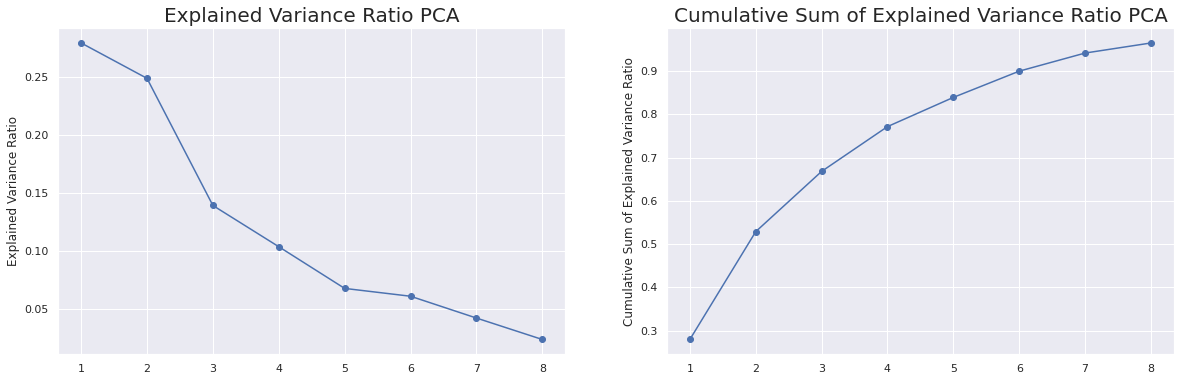

In [55]:
pca = PCA(n_components=.95).fit(normalized_x_train)

fig, ax = plt.subplots(ncols=2, figsize=(20,6))
ax1, ax2 = ax.ravel()

ratio = pca.explained_variance_ratio_
ax1.plot(range(1,len(ratio)+1), ratio, 'o-')
ax1.set_title('Explained Variance Ratio PCA', fontsize=20)
ax1.set_ylabel('Explained Variance Ratio')

ratio = pca.explained_variance_ratio_
ax2.plot(range(1,len(ratio)+1), np.cumsum(ratio), 'o-')
ax2.set_title('Cumulative Sum of Explained Variance Ratio PCA', fontsize=20)
ax2.set_ylabel('Cumulative Sum of Explained Variance Ratio');

In [56]:
x_train_pca = pca.transform(normalized_x_train)
x_test_pca = pca.transform(normalized_x_test)

In [57]:
logreg_model_pca = LogisticRegression(C=0.01, solver='liblinear').fit(x_train_pca, y_train)

In [58]:
y_preds_train_pca = logreg_model_pca.predict(x_train_pca)
y_preds_test_pca = logreg_model_pca.predict(x_test_pca)

In [59]:
# Evaluation
print('Training Set Score (8 PCs): {}'.format(accuracy_score(y_train, y_preds_train_pca)))
print('Test Set Score (8 PCs): {}\n'.format(accuracy_score(y_test, y_preds_test_pca)))

print('Training Set Score (full dataset): {}'.format(full_logreg_score_train))
print('Test Set Score (full dataset): {}'.format(full_logreg_score_test))

Training Set Score (8 PCs): 0.9651162790697675
Test Set Score (8 PCs): 0.9090909090909091

Training Set Score (full dataset): 0.9767441860465116
Test Set Score (full dataset): 0.9090909090909091


In [60]:
pd.crosstab(y_test, y_preds_test_pca, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,1,All
Actual,,
0,2,2
1,20,20
All,22,22
